<a href="https://colab.research.google.com/github/joelmaf/fundamentos/blob/main/Aula05_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

Previsão do preço para uma casa de 100m²: 350.00


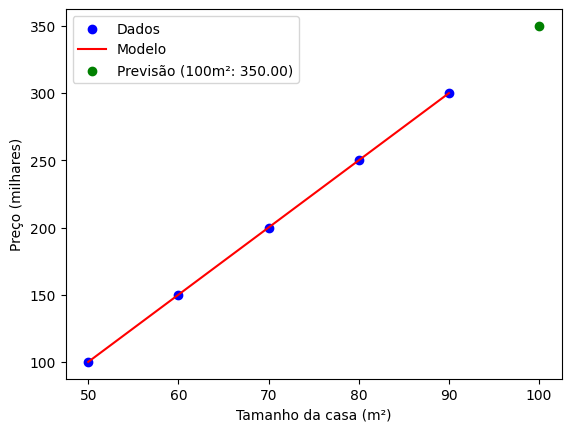

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Dados simulados (tamanho da casa em m² e preço em milhares)
tamanho_casa = np.array([50, 60, 70, 80, 90]).reshape(-1, 1)
preco_casa = np.array([100, 150, 200, 250, 300])

X = tamanho_casa
y = preco_casa

# Modelo de Regressão Linear
model = LinearRegression()
model.fit(X, y)

# Prevendo para uma casa de 100m²
X_new = np.array([[100]])
y_pred = model.predict(X_new)
print(f'Previsão do preço para uma casa de 100m²: {y_pred[0]:.2f}')

# Visualização
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(X, model.predict(X), color='red', label='Modelo')

plt.scatter(100, y_pred, color='green', label=f'Previsão (100m²: {y_pred[0]:.2f})')

plt.xlabel('Tamanho da casa (m²)')
plt.ylabel('Preço (milhares)')
plt.legend()
plt.show()


# Classificação

Prever se um cliente é fiel ou não a partir de dados básicos, como gasto médio mensal, número de visitas ao site e histórico de compras.

1 = Cliente Fiel, 0 = Não Fiel

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Dados simulados: [Gasto Médio (R$), Número de Visitas ao Site, Número de Compras]
X = np.array([
    [500, 10, 3],
    [1000, 25, 10],
    [250, 2, 0],
    [400, 5, 1],
    [1500, 50, 15],
    [200, 1, 0],
    [1200, 40, 12]
])

# Labels: 1 = Cliente Fiel, 0 = Não Fiel
y = np.array([1, 1, 0, 0, 1, 0, 1])

# Modelo de Classificação: Regressão Logística
model = LogisticRegression()
model.fit(X, y)


# Prevendo um novo cliente
novo_cliente = np.array([[800, 20, 7]])
print("Cliente Fiel" if model.predict(novo_cliente) == 1 else "Cliente Não Fiel")


Cliente Fiel


# Clusterização

Clusterização para identificar grupos de produtos semelhantes em um e-commerce com base em preço e número de vendas.

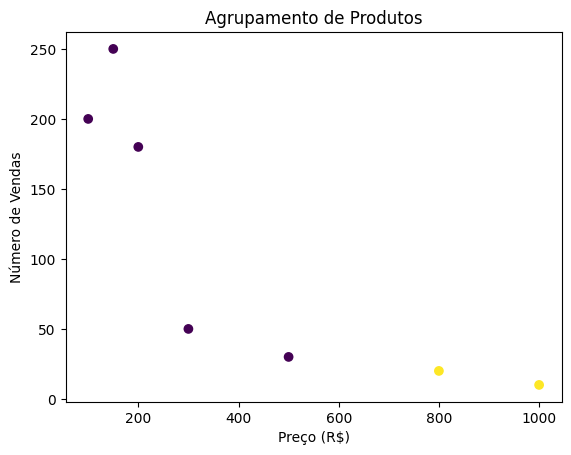

Produto A pertence ao Grupo 0
Produto B pertence ao Grupo 0
Produto C pertence ao Grupo 0
Produto D pertence ao Grupo 0
Produto E pertence ao Grupo 1
Produto F pertence ao Grupo 1
Produto G pertence ao Grupo 0


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Dados simulados: [Preço (R$), Número de Vendas]
X = np.array([
    [100, 200],  # Produto A
    [150, 250],  # Produto B
    [300, 50],   # Produto C
    [500, 30],   # Produto D
    [1000, 10],  # Produto E
    [800, 20],   # Produto F
    [200, 180]   # Produto G
])


# Modelo K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Visualização
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Preço (R$)')
plt.ylabel('Número de Vendas')
plt.title('Agrupamento de Produtos')
plt.show()

# Resultados: Grupos atribuídos aos produtos
for i, label in enumerate(labels):
    print(f"Produto {chr(65 + i)} pertence ao Grupo {label}")


# Redes Neurais

Prever o faturamento em milhares de reais com base em: orçamento de marketing (em R$ mil), número de campanhas publicitárias

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


orçamento_marketing = []
número_campanhas = []
faturamento = []

# Gerar 1000 registros fictícios
for _ in range(1000):
    orçamento = np.random.uniform(50, 500)                                  # Orçamento entre 50 e 500 mil
    campanhas = np.random.randint(1, 21)                                    # Número de campanhas entre 1 e 20
    receita = 0.6 * orçamento + 10 * campanhas + np.random.normal(0, 20)    # Receita com ruído
    orçamento_marketing.append(orçamento)
    número_campanhas.append(campanhas)
    faturamento.append(receita)

# Combinar em uma matriz para X e vetor para y
X = np.column_stack((orçamento_marketing, número_campanhas))
y = np.array(faturamento)

# Construir a Rede Neural
model = Sequential([
    Dense(10, activation='relu', input_dim=2),  # Camada oculta com 10 neurônios
    Dense(1, activation='linear')               # Camada de saída
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Treinar o modelo
model.fit(X, y, epochs=100, verbose=0)

# Prever faturamento para um novo orçamento e número de campanhas
# Exemplo: R$ 250 mil de orçamento, 7 campanhas
novo_dado = np.array([[250, 7]])
previsao = model.predict(novo_dado)
print(f"Previsão de faturamento: R$ {previsao[0][0]:.2f} mil")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Previsão de faturamento: R$ 222.84 mil


# IA Generativa

Precisa ter um HF_TOKEN no Huggingface

In [ ]:
from transformers import pipeline

# Carrega modelo GPT-2 para geração de texto
generator = pipeline('text-generation', model='gpt2')

# Input prompt
prompt = "Artificial intelligence is transforming the way we live and work. It is being applied in various fields, such as"

# Geração de Texto
result = generator(prompt, max_length=50, num_return_sequences=1)
print("Generated Text:", result[0]['generated_text'])


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Generated Text: Artificial intelligence is transforming the way we live and work. It is being applied in various fields, such as healthcare, transportation and manufacturing. By helping to develop technology that makes life easier for our everyday life, AI will make life less stressful and work
